In [1]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

# Importamos las diferentes funciones definidas que estan en la carpeta 'modulos'
from modulos.extraccion_campo_busq import extraer_campo
from modulos.extraccion_consulta import extraer_sintaxis
from modulos.validacion_campos_busq import verificar_error_campo

In [2]:
# Abrimos el archivo 'Estadisticas consultas catálogo-reportresults.csv' que contiene los datos de la busqueda de los usuarios en el sistema Koha
#desde septiembre de 2018, hasta la primera semana de septiembre de 2024
datos = pd.read_csv("1 - archivos/Estadísticas consultas catálogo-reportresults.csv", sep=';')

DESCRIPCIÓN DE LAS COLUMNAS DEL ARCHIVO:

* `sessionid`    ---> Identificador del inicio de sesión.
* `query_desc`   ---> Campos utilizados en la búsqueda.
* `type`         ---> ('biblio', 'authority').
* `total`        ---> Cantidad de registros que devuelve el sistema con los términos ingresados.
* `time`         ---> Fecha y hora de la búsqueda.
* `branchcode`   ---> Identificador de la Facultad de Ingeniería ('FING').
* `categorycode` ---> Identificadores de la persona que hace la búsqueda, si es docente, de biblioteca, egresado, invitado de otra facultad, alumno de intercambio, etc. 


## Semana 1

### Exploramos los datos crudos

In [3]:
# Mostramos las primeras filas del archivo
datos.head()

,sessionid,query_desc,type,total,time,branchcode,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:27:49,FING,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:28:25,FING,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:29:51,FING,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:02,FING,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:13,FING,DOCENTE


In [4]:
# Mostramos los tipos de datos de las columnas
datos.dtypes

sessionid       object
query_desc      object
type            object
total            int64
time            object
branchcode      object
categorycode    object
dtype: object

In [5]:
# Mostramos algunas de las estadisticas de la columna 'total'
datos['total'].describe()

count     2535.000000
mean       190.157791
std        820.385073
min          0.000000
25%          2.000000
50%          7.000000
75%         33.000000
max      11525.000000
Name: total, dtype: float64

In [ ]:
# Cantidad de busquedas que no arrojaron resultados
cero_resultados = datos[datos['total'] == 0]

print(f"Las búsquedas totales que no tuvieron ningun resultado son: {len(cero_resultados)}")
print(f"Esto representa un porcentaje del {round((len(cero_resultados) / len(datos))*100, 2)} %")

Las búsquedas totales que no tuvieron ningun resultado son: 317
Esto representa un porcentaje del 12.5 %


In [7]:
# Buscamos la consulta que obtuvo el mayor numero de resultados encontrado
max_resultado = datos['total'].max()
print(f"Máximo de resultados que encontró el sistema: {max_resultado}")

# Encontramos el usuario que realizo esta busqueda
datos[datos['total'] == max_resultado]

Máximo de resultados que encontró el sistema: 11525


,sessionid,query_desc,type,total,time,branchcode,categorycode
1394,7a7a070b4c157d901bc30c69555b7dfa,"kw,wrdl: c++,",biblio,11525,2022-11-01 11:30:25,FING,BIBLIOTECA


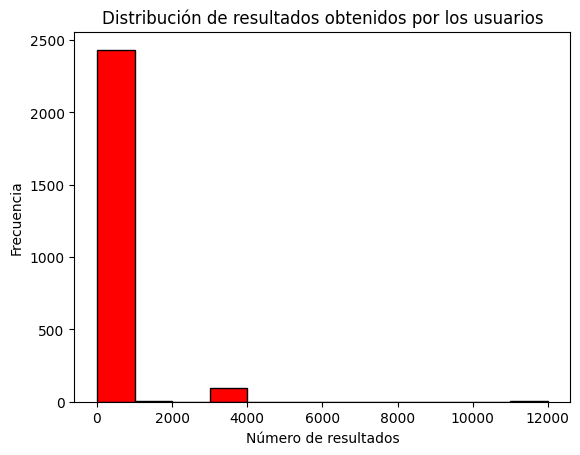

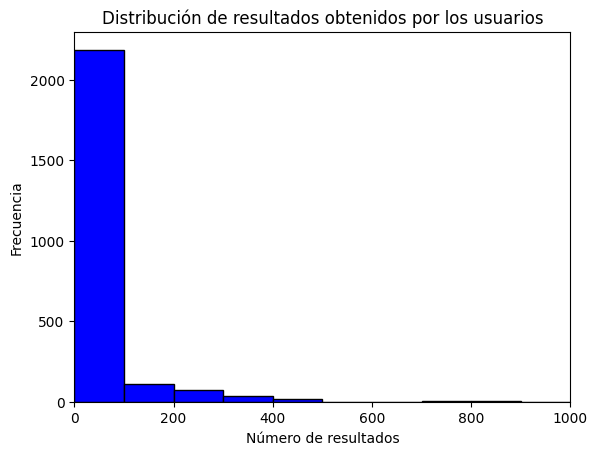

In [8]:
# Definimos los rangos de las barras: de 1000 en 1000
bins = range(0, int(datos['total'].max()) + 1000, 1000)

# Histograma de la columna 'total'
plt.hist(datos['total'], bins=bins, edgecolor='black', color='red')
plt.title('Distribución de resultados obtenidos por los usuarios')
plt.xlabel('Número de resultados')
plt.ylabel('Frecuencia')
plt.show()

#=======================================================================================
# Histograma de la columna 'total' centrada en los resultados menores a 1000
# Definimos los rangos de las barras: de 100 en 100
bins = range(0, int(datos['total'].max()) + 100, 100)
plt.hist(datos['total'], bins=bins, edgecolor='black', color='blue')
plt.title('Distribución de resultados obtenidos por los usuarios')
plt.xlabel('Número de resultados')
plt.ylabel('Frecuencia')
plt.xlim(0, 1000)
plt.show()

## Semana 2

### Identificación de las variables más importantes

In [9]:
# Filtramos el Data Frame: nos quedaremos con las variables que resolverán los objetivos planteados
df_filtrado = datos[['sessionid', 'query_desc', 'total', 'time', 'categorycode']]

## Semana 3

### Etapa de limpieza

In [10]:
# Borramos las filas duplicadas en el Data Frame
df_filtrado.drop_duplicates()

print("Cantidad de filas duplicadas eliminadas:", len(df_filtrado) - len(df_filtrado.drop_duplicates()))
print(f"Representando un {((len(df_filtrado) - len(df_filtrado.drop_duplicates())) / len(df_filtrado)) * 100:.2f}% del total de filas")

Cantidad de filas duplicadas eliminadas: 65
Representando un 2.56% del total de filas


In [11]:
# Nos fijamos si las columnas tienen algún valor nulo
df_filtrado.info()

# Podemos observar que de las 2535 filas ninguna posee valores nulos en sus variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sessionid     2535 non-null   object
 1   query_desc    2535 non-null   object
 2   total         2535 non-null   int64 
 3   time          2535 non-null   object
 4   categorycode  2535 non-null   object
dtypes: int64(1), object(4)
memory usage: 99.2+ KB


In [12]:
# Guardamos el DataFrame filtrado en un archivo CSV
df_filtrado.to_csv('1 - archivos/df_filtrado.csv', index=False)

In [13]:
# Hay busquedas que fueron realizadas para una practica academica, estas busquedas como contienen informacion que no es relevante para el analisis, las eliminaremos
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['sessionid'] == 'e03def7e497ec6c9bb60f290d5247dc8'].index)

## Semana 4

### Preparación de los datos para el análisis estadístico

DEFINICIÓN DE LOS CAMPOS DE BÚSQUEDA UTILIZADOS POR LOS USUARIOS Y QUE BRINDA EL SISTEMA:

* `kw`        ----> Palabra clave. Palabra que tiene que estar presente en el material, puede ser en cualquier campo.
* `au/AU`     ----> Nombre o apellido del autor. Todo el material que está cargado para ese autor.
* `mc-itype`  ----> Tipo del material, ya sea libro, revista, tesis, folleto, apuntes, sean impresas u otro formato.
* `ti`        ----> Título del material.
* `an`        ----> Número de la autoridad registrada en la biblioteca. Asocia ese número con X autor/materia.
* `su`        ----> Materia/s asociada/s al contenido del material. Descriptores y palabras claves asignados por el personal.
* `BC/bc`     ----> Equivalente al código de barras de un producto. Número del inventario.
* `su-to`     ----> Escritura del sistema cuando en el catálogo en línea, la sintaxis involucra un elemento inicial y le agrega un tema.
* `callnum`   ----> Número del estante (en biblioteca) donde está el material.
* `I-format`  ----> El formato (soporte del material). Excluye impreso.
* `se`        ----> Identifica una serie/colección.
* `In`        ----> Es el idioma del material.
* `Provider`  ----> Editorial del libro.


In [14]:
# Creamos una lista de los campos de búsqueda que estan disponibles en el sistema
campos_busqueda = ['kw', 'au', 'mc-itype', 'ti', 'an', 'itype', 'su', 'BC', 'bc', 'callnum', 
    'I-format', 'AU', 'an', 'se', 'In', 'bx', 'se', 'su-to', 'mc-itype,phr', 'l-format', 'Provider']

# Creamos una expresión regular para encontrar los campos
patrones = r'\b(?:' + '|'.join(campos_busqueda) + r')\b'

# Buscamos las búsquedas que no tienen un campo ingresado
filas_sin_query = df_filtrado[~ df_filtrado['query_desc'].str.contains(patrones, na=False)]

In [15]:
# Imputamos las filas que no tienen campos ingresados
filas_sin_query.loc[filas_sin_query.index == 750, 'query_desc'] = filas_sin_query.loc[750, 'query_desc'].replace('robot', 'kw: robot')
filas_sin_query.loc[filas_sin_query.index == 752, 'query_desc'] = filas_sin_query.loc[752, 'query_desc'].replace('robot', 'kw: robot')
filas_sin_query.loc[filas_sin_query.index == 754, 'query_desc'] = filas_sin_query.loc[754, 'query_desc'].replace('da vinci', 'kw,wrdl: da vinci')
filas_sin_query.loc[filas_sin_query.index == 756, 'query_desc'] = filas_sin_query.loc[756, 'query_desc'].replace('robotica', 'kw: robotica')

In [16]:
# Actualizamos los valores de los campos de busqueda en el data frame principal
df_filtrado.update(filas_sin_query)

In [17]:
# Aplicar la función para crear una nueva columna 'campos_utilzado'
df_filtrado.loc[:, 'campo_utilizado'] = df_filtrado['query_desc'].apply(extraer_campo)

#### Pero como no se guardan todos los campos que utilizo el usuario, tendremos que realizar otra imputacion para estos casos


In [18]:
# Buscamos las filas que tienen más de un : en la búsqueda. Esto nos indica que el usuario ingresó más de un campo de búsqueda
df_filtrado['contador'] = df_filtrado['query_desc'].str.count(':')

# Filtramos las filas que tienen más de un : en la búsqueda
dos_puntos = df_filtrado[df_filtrado['contador'] > 1]

# Borramos la columna 'contador' ya que no es necesaria
df_filtrado.drop('contador', axis=1, inplace=True)

In [19]:
# Imputación de los campos utilizados por los usuarios para hacer la busqueda
df_filtrado.loc[5, 'campo_utilizado'] = (df_filtrado.loc[5, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[6, 'campo_utilizado'] = (df_filtrado.loc[6, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[7, 'campo_utilizado'] = (df_filtrado.loc[7, 'campo_utilizado'] + ', su-to' + ', su-to' + ', su-to')
df_filtrado.loc[8, 'campo_utilizado'] = (df_filtrado.loc[8, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[9, 'campo_utilizado'] = (df_filtrado.loc[9, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[10, 'campo_utilizado'] = (df_filtrado.loc[10, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[11, 'campo_utilizado'] = (df_filtrado.loc[11, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[29, 'campo_utilizado'] = (df_filtrado.loc[29, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[33, 'campo_utilizado'] = (df_filtrado.loc[33, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[35, 'campo_utilizado'] = (df_filtrado.loc[35, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[48, 'campo_utilizado'] = (df_filtrado.loc[48, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[49, 'campo_utilizado'] = (df_filtrado.loc[49, 'campo_utilizado'] + ', mc-itype' + ', mc-itype')
df_filtrado.loc[111, 'campo_utilizado'] = (df_filtrado.loc[111, 'campo_utilizado'] + ', au')
df_filtrado.loc[252, 'campo_utilizado'] = (df_filtrado.loc[252, 'campo_utilizado'] + ', l-format')
df_filtrado.loc[256, 'campo_utilizado'] = (df_filtrado.loc[256, 'campo_utilizado'] + ', l-format')
df_filtrado.loc[277, 'campo_utilizado'] = (df_filtrado.loc[277, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[288, 'campo_utilizado'] = (df_filtrado.loc[288, 'campo_utilizado'] + ', au')
df_filtrado.loc[358, 'campo_utilizado'] = (df_filtrado.loc[358, 'campo_utilizado'] + ', ti'+ ', not au')
df_filtrado.loc[368, 'campo_utilizado'] = (df_filtrado.loc[368, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[374, 'campo_utilizado'] = (df_filtrado.loc[374, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[395, 'campo_utilizado'] = (df_filtrado.loc[395, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[397, 'campo_utilizado'] = (df_filtrado.loc[397, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[429, 'campo_utilizado'] = (df_filtrado.loc[429, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[431, 'campo_utilizado'] = (df_filtrado.loc[431, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[432, 'campo_utilizado'] = (df_filtrado.loc[432, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[444, 'campo_utilizado'] = (df_filtrado.loc[444, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[453, 'campo_utilizado'] = (df_filtrado.loc[453, 'campo_utilizado'] + ', su')
df_filtrado.loc[628, 'campo_utilizado'] = (df_filtrado.loc[628, 'campo_utilizado'] + ', au')
df_filtrado.loc[636, 'campo_utilizado'] = (df_filtrado.loc[636, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[637, 'campo_utilizado'] = (df_filtrado.loc[637, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[649, 'campo_utilizado'] = (df_filtrado.loc[649, 'campo_utilizado'] + ', au')
df_filtrado.loc[746, 'campo_utilizado'] = (df_filtrado.loc[746, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[747, 'campo_utilizado'] = (df_filtrado.loc[747, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[749, 'campo_utilizado'] = (df_filtrado.loc[749, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[768, 'campo_utilizado'] = (df_filtrado.loc[768, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[773, 'campo_utilizado'] = (df_filtrado.loc[773, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[774, 'campo_utilizado'] = (df_filtrado.loc[774, 'campo_utilizado'] + ', se')
df_filtrado.loc[775, 'campo_utilizado'] = (df_filtrado.loc[775, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[776, 'campo_utilizado'] = (df_filtrado.loc[776, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[779, 'campo_utilizado'] = (df_filtrado.loc[779, 'campo_utilizado'] + ', au')
df_filtrado.loc[780, 'campo_utilizado'] = (df_filtrado.loc[780, 'campo_utilizado'] + ', au')
df_filtrado.loc[862, 'campo_utilizado'] = (df_filtrado.loc[862, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[868, 'campo_utilizado'] = (df_filtrado.loc[868, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[869, 'campo_utilizado'] = (df_filtrado.loc[869, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[884, 'campo_utilizado'] = (df_filtrado.loc[884, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[964, 'campo_utilizado'] = (df_filtrado.loc[964, 'campo_utilizado'] + ', au')
df_filtrado.loc[974, 'campo_utilizado'] = (df_filtrado.loc[974, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[975, 'campo_utilizado'] = (df_filtrado.loc[975, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1117, 'campo_utilizado'] = (df_filtrado.loc[1117, 'campo_utilizado'] + ', au')
df_filtrado.loc[1119, 'campo_utilizado'] = (df_filtrado.loc[1119, 'campo_utilizado'] + ', au')
df_filtrado.loc[1131, 'campo_utilizado'] = (df_filtrado.loc[1131, 'campo_utilizado'] + ', au')
df_filtrado.loc[1187, 'campo_utilizado'] = (df_filtrado.loc[1187, 'campo_utilizado'] + ', au')
df_filtrado.loc[1188, 'campo_utilizado'] = (df_filtrado.loc[1188, 'campo_utilizado'] + ', au')
df_filtrado.loc[1189, 'campo_utilizado'] = (df_filtrado.loc[1189, 'campo_utilizado'] + ', au' + ', mc-itype' + ', mc-itype')
df_filtrado.loc[1196, 'campo_utilizado'] = (df_filtrado.loc[1196, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1223, 'campo_utilizado'] = (df_filtrado.loc[1223, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1273, 'campo_utilizado'] = (df_filtrado.loc[1273, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1275, 'campo_utilizado'] = (df_filtrado.loc[1275, 'campo_utilizado'] + ', au')
df_filtrado.loc[1302, 'campo_utilizado'] = (df_filtrado.loc[1302, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1303, 'campo_utilizado'] = (df_filtrado.loc[1303, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1304, 'campo_utilizado'] = (df_filtrado.loc[1304, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1305, 'campo_utilizado'] = (df_filtrado.loc[1305, 'campo_utilizado'] + ', ti')
df_filtrado.loc[1306, 'campo_utilizado'] = (df_filtrado.loc[1306, 'campo_utilizado'] + ', ti' + ', mc-itype' + ', mc-itype')
df_filtrado.loc[1307, 'campo_utilizado'] = (df_filtrado.loc[1307, 'campo_utilizado'] + ', ti' + ', In')
df_filtrado.loc[1384, 'campo_utilizado'] = (df_filtrado.loc[1384, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1470, 'campo_utilizado'] = (df_filtrado.loc[1470, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1471, 'campo_utilizado'] = (df_filtrado.loc[1471, 'campo_utilizado'] + ', mc-itype' + ', su-to')
df_filtrado.loc[1472, 'campo_utilizado'] = (df_filtrado.loc[1472, 'campo_utilizado'] + ', mc-itype' + ', su-to')
df_filtrado.loc[1473, 'campo_utilizado'] = (df_filtrado.loc[1473, 'campo_utilizado'] + ', mc-itype' + ', su-to')
df_filtrado.loc[1474, 'campo_utilizado'] = (df_filtrado.loc[1474, 'campo_utilizado'] + ', mc-itype' + ', su-to')
df_filtrado.loc[1475, 'campo_utilizado'] = (df_filtrado.loc[1475, 'campo_utilizado'] + ', mc-itype' + ', su-to' + ', au')
df_filtrado.loc[1494, 'campo_utilizado'] = (df_filtrado.loc[1494, 'campo_utilizado'] + ', au')
df_filtrado.loc[1593, 'campo_utilizado'] = (df_filtrado.loc[1593, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1594, 'campo_utilizado'] = (df_filtrado.loc[1594, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1596, 'campo_utilizado'] = (df_filtrado.loc[1596, 'campo_utilizado'] + ', kw')
df_filtrado.loc[1597, 'campo_utilizado'] = (df_filtrado.loc[1597, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1658, 'campo_utilizado'] = (df_filtrado.loc[1658, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1731, 'campo_utilizado'] = (df_filtrado.loc[1731, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1769, 'campo_utilizado'] = (df_filtrado.loc[1769, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1782, 'campo_utilizado'] = (df_filtrado.loc[1782, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1841, 'campo_utilizado'] = (df_filtrado.loc[1841, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1842, 'campo_utilizado'] = (df_filtrado.loc[1842, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1845, 'campo_utilizado'] = (df_filtrado.loc[1845, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1880, 'campo_utilizado'] = (df_filtrado.loc[1880, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1961, 'campo_utilizado'] = (df_filtrado.loc[1961, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1962, 'campo_utilizado'] = (df_filtrado.loc[1962, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1968, 'campo_utilizado'] = (df_filtrado.loc[1968, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1969, 'campo_utilizado'] = (df_filtrado.loc[1969, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1978, 'campo_utilizado'] = (df_filtrado.loc[1978, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2045, 'campo_utilizado'] = (df_filtrado.loc[2045, 'campo_utilizado'] + ', au')
df_filtrado.loc[2202, 'campo_utilizado'] = (df_filtrado.loc[2202, 'campo_utilizado'] + ', l-format')
df_filtrado.loc[2206, 'campo_utilizado'] = (df_filtrado.loc[2206, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2217, 'campo_utilizado'] = (df_filtrado.loc[2217, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2219, 'campo_utilizado'] = (df_filtrado.loc[2219, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2239, 'campo_utilizado'] = (df_filtrado.loc[2239, 'campo_utilizado'] + ', au')
df_filtrado.loc[2323, 'campo_utilizado'] = (df_filtrado.loc[2323, 'campo_utilizado'] + ', au')
df_filtrado.loc[2365, 'campo_utilizado'] = (df_filtrado.loc[2365, 'campo_utilizado'] + ', mc-itype' + ', mc-itype')
df_filtrado.loc[2379, 'campo_utilizado'] = (df_filtrado.loc[2379, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2427, 'campo_utilizado'] = (df_filtrado.loc[2427, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2474, 'campo_utilizado'] = (df_filtrado.loc[2474, 'campo_utilizado'] + ', au')
df_filtrado.loc[2490, 'campo_utilizado'] = (df_filtrado.loc[2490, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2491, 'campo_utilizado'] = (df_filtrado.loc[2491, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[2533, 'campo_utilizado'] = (df_filtrado.loc[2533, 'campo_utilizado'] + ', au')

In [20]:
# Agregamos una nueva columna que contabilice la cantidad de campos utilizados por el usuario
df_filtrado['cant_campos_utilizados'] = df_filtrado['campo_utilizado'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)

In [21]:
# Pasamos todos los campos utilizados a minúsculas
df_filtrado['campo_utilizado'] = df_filtrado['campo_utilizado'].str.lower()

### Representaciones graficas de los primeros analisis

#### Gráfico de barras para ver la cantidad de campos de busquedas utilizados a la vez

cant_campos_utilizados
0       1
1    2382
2      85
3      14
4       4
Name: count, dtype: int64


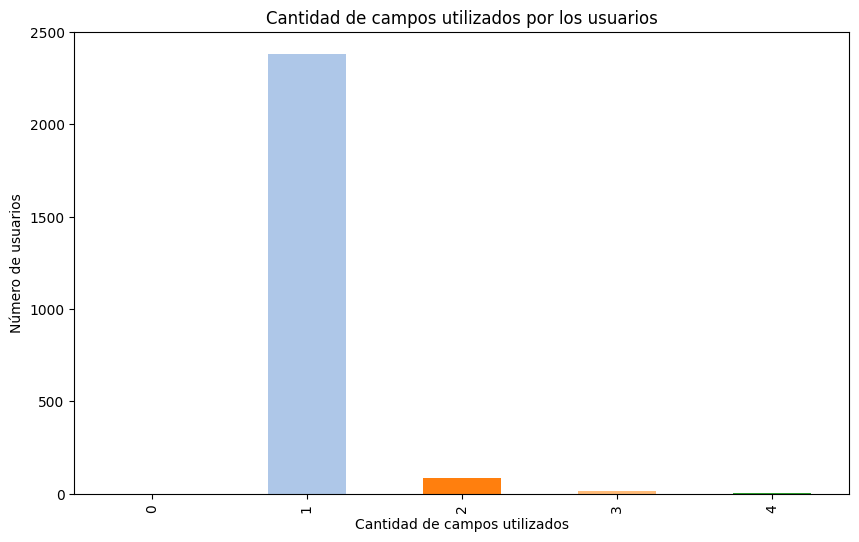

In [22]:
# Contamos la cantidad de veces que se utiliza cada cantidad de campos
cant_campos = df_filtrado['cant_campos_utilizados'].value_counts().sort_index()
print(cant_campos)

# Gráfico de barras para la cantidad de campos utilizados por los usuarios
plt.figure(figsize=(10, 6))
cant_campos.plot(kind='bar', color=plt.cm.tab20.colors)
plt.xlabel('Cantidad de campos utilizados')
plt.ylabel('Número de usuarios')
plt.title('Cantidad de campos utilizados por los usuarios')
plt.show()

#### Gráfico de barras para visualizar los campos de busqueda mas utilizados por los usuarios

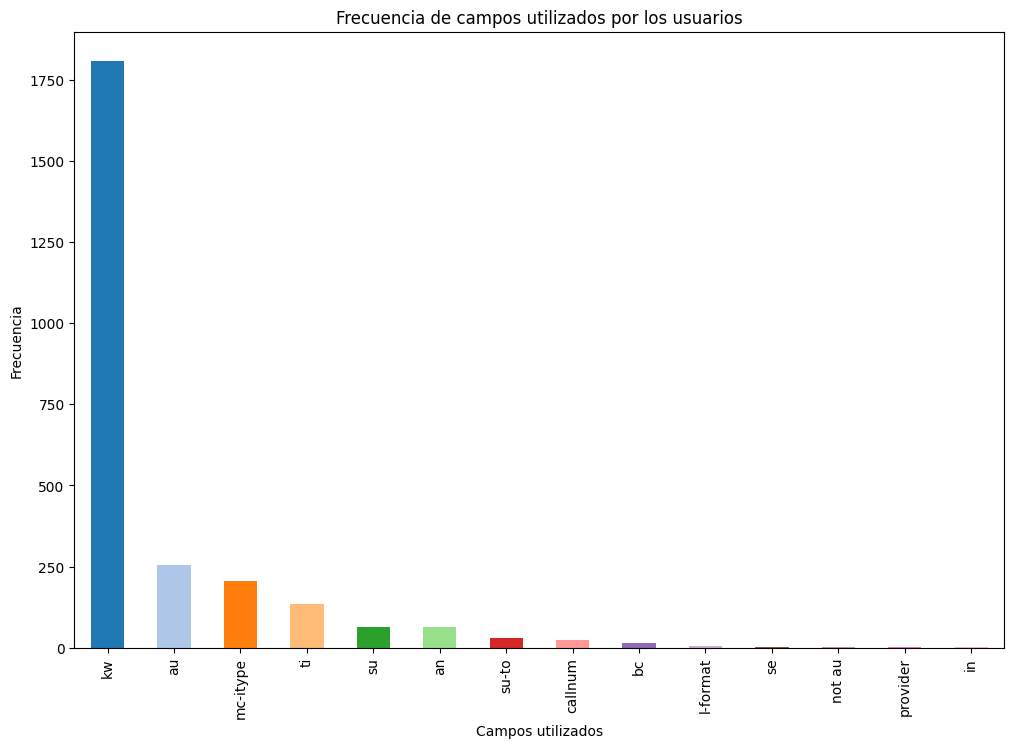

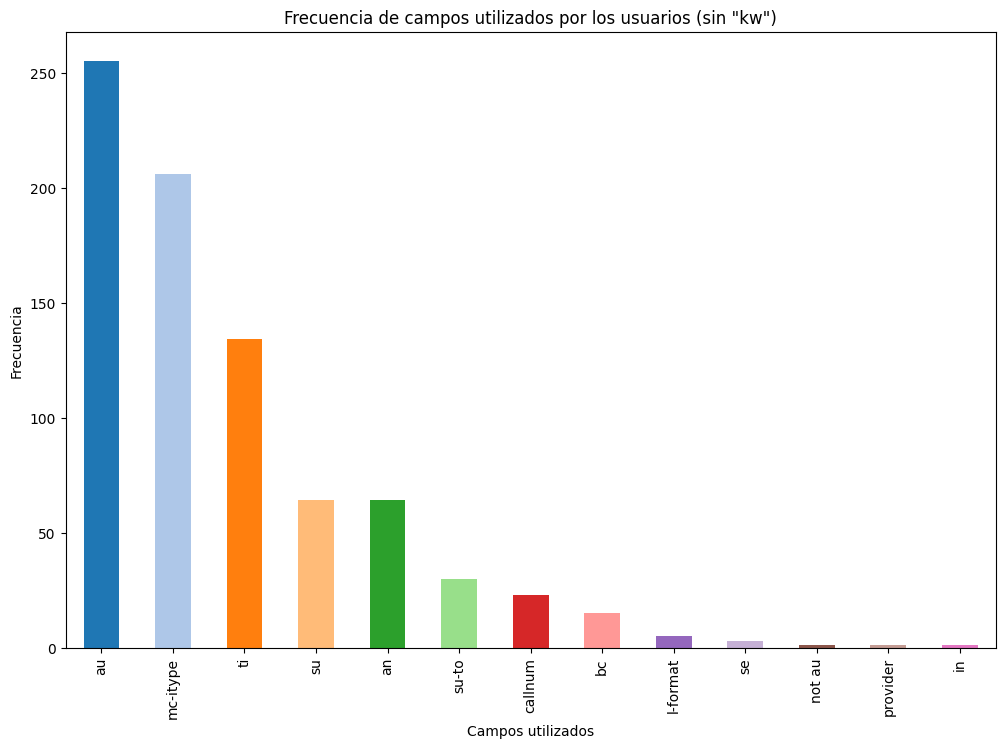

In [23]:
# Convertimos los campos a minúsculas y sumamos las frecuencias
frecuencia_campos = df_filtrado['campo_utilizado'].str.lower().str.split(', ', expand=True).stack().value_counts()

# Gráfico de las frecuencias de los campos utilizados por los usuarios
plt.figure(figsize=(12, 8))
frecuencia_campos.plot(kind='bar', color=plt.cm.tab20.colors)
plt.xlabel('Campos utilizados')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de campos utilizados por los usuarios')
plt.show()

#===========================================================================================================================

# Gráfico de las frecuencias de los campos utilizados por los usuarios sin 'kw'
# Filtramos la serie para excluir el campo 'kw'
frecuencia_campos_sin_kw = frecuencia_campos.drop('kw')

plt.figure(figsize=(12, 8))
frecuencia_campos_sin_kw.plot(kind='bar', color=plt.cm.tab20.colors)
plt.xlabel('Campos utilizados')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de campos utilizados por los usuarios (sin "kw")')
plt.show()

#### Tabla de frecuencias de las combinaciones de campos que utilizaron los usuarios

In [24]:
# Ordenar los términos en cada combinación para estandarizar
df_filtrado['campo_utilizado'] = df_filtrado['campo_utilizado'].fillna('').apply(lambda x: ', '.join(sorted(x.split(', '))))

# Filtramos las filas con más de un campo utilizado
combinaciones_campos = df_filtrado[df_filtrado['cant_campos_utilizados'] > 1]

# Contamos las combinaciones de campos utilizados
combinaciones_frecuencia = combinaciones_campos['campo_utilizado'].value_counts()
combinaciones_frecuencia_df = combinaciones_frecuencia.reset_index()
combinaciones_frecuencia_df.columns = ['Combinacion de Campos', 'Frecuencia']
combinaciones_frecuencia_df['Porcentaje'] = round((combinaciones_frecuencia_df['Frecuencia'] / combinaciones_frecuencia_df['Frecuencia'].sum()) * 100,2)

# Mostramos la tabla de frecuencia
print(tabulate(combinaciones_frecuencia_df, headers='keys', tablefmt='pipe', showindex=False))

| Combinacion de Campos         |   Frecuencia |   Porcentaje |
|:------------------------------|-------------:|-------------:|
| kw, mc-itype                  |           35 |        33.98 |
| au, kw                        |           12 |        11.65 |
| kw, su-to                     |            9 |         8.74 |
| au, mc-itype                  |            5 |         4.85 |
| au, ti                        |            4 |         3.88 |
| mc-itype, mc-itype, su-to     |            4 |         3.88 |
| au, su-to                     |            3 |         2.91 |
| mc-itype, su-to               |            3 |         2.91 |
| mc-itype, mc-itype            |            3 |         2.91 |
| l-format, mc-itype            |            3 |         2.91 |
| au, su-to, su-to              |            3 |         2.91 |
| au, mc-itype, mc-itype, ti    |            2 |         1.94 |
| kw, kw, mc-itype              |            2 |         1.94 |
| mc-itype, su                  |       

## Semana 5

#### Analizar los porcentajes de busquedas según la categoría del usuario

|    | categorycode   |   count |
|---:|:---------------|--------:|
|  0 | AGRO           |       6 |
|  1 | BIBLIOTECA     |    2048 |
|  2 | BIOINF         |       6 |
|  3 | BIOINGENIE     |      29 |
|  4 | DOCENTE        |     164 |
|  5 | HIST           |      34 |
|  6 | INTERALUM      |       2 |
|  7 | INVI           |      54 |
|  8 | S              |     121 |
|  9 | TEC_MED_N      |      21 |
| 10 | TEC_PROD_M     |       1 |


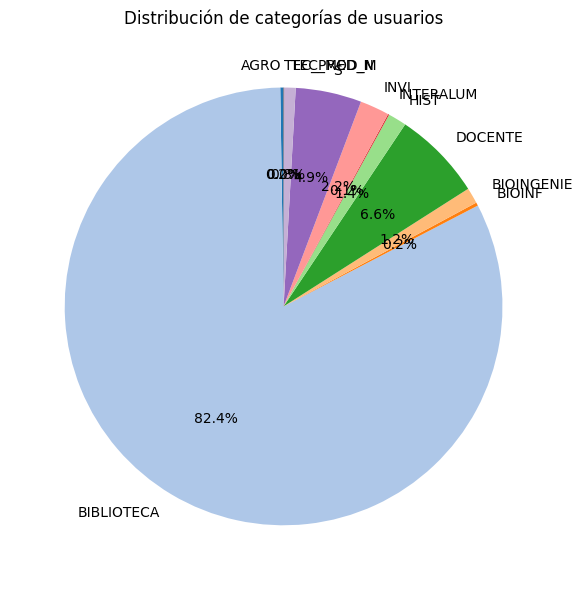

In [25]:
# Extraemos las categorias de los usuarios y contamos sus frecuencias
total_categorias = df_filtrado['categorycode'].value_counts().sort_index()
total_categorias_df = total_categorias.reset_index()
total_categorias_df.columns = ['categorycode', 'count']
print(tabulate(total_categorias_df, headers='keys', tablefmt='pipe', showindex=True))

# Grafico de torta para total_categorias sin generalizar
colors = plt.cm.tab20.colors
plt.figure(figsize=(10, 6))
total_categorias.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución de categorías de usuarios')
plt.ylabel('')
plt.tight_layout()
plt.show()

categorycode_generalizado
Dentro de la Biblioteca    2048
Fuera de la Biblioteca      438
Name: count, dtype: int64


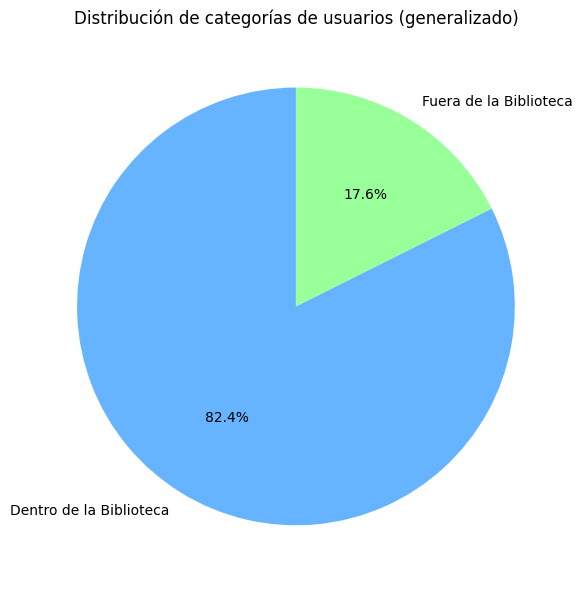

In [26]:
# Definimos un diccionario para mapear las categorías originales a las categorías generalizadas
diccionario_categorias = {
    'AGRO': 'Fuera de la Biblioteca',
    'BIBLIOTECA': 'Dentro de la Biblioteca',
    'BIOINF': 'Fuera de la Biblioteca',
    'BIOINGENIE': 'Fuera de la Biblioteca',
    'DOCENTE': 'Fuera de la Biblioteca',
    'HIST': 'Fuera de la Biblioteca',
    'INTERALUM': 'Fuera de la Biblioteca',
    'INVI': 'Fuera de la Biblioteca',
    'S': 'Fuera de la Biblioteca',
    'TEC_MED_N': 'Fuera de la Biblioteca',
    'TEC_PROD_M': 'Fuera de la Biblioteca'
}

# Aplicamos el mapeo a la columna 'categorycode'
df_filtrado['categorycode_generalizado'] = df_filtrado['categorycode'].map(diccionario_categorias)

# Grafico de torta para total_categorias generalizado
colores = ['#66b3ff','#99ff99']
total_categorias_generalizado = df_filtrado['categorycode_generalizado'].value_counts().sort_index()
print(total_categorias_generalizado)
plt.figure(figsize=(10, 6))
total_categorias_generalizado.plot(kind='pie', autopct='%1.1f%%', colors=colores, startangle=90)
plt.title('Distribución de categorías de usuarios (generalizado)')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Análisis de los datos que no obtuvieron resultados

#### Extraemos las sintaxis de los usuarios cuando el sistema no encuentra ningun resultado

In [27]:
# Filtramos otra vez las búsquedas que tengan como resultado cero, pero ahora con las nuevas columnas creadas
cero_resultados = df_filtrado[df_filtrado['total'] == 0].copy()

# Vemos cuántas búsquedas tienen cero resultados
print(len(cero_resultados))

# Aplicamos la función para extraer la sintaxis de las búsquedas que tienen cero resultados
cero_resultados.loc[:, 'sintaxis'] = cero_resultados['query_desc'].apply(extraer_sintaxis)

# Reordenamos las columnas
cero_resultados = cero_resultados[['sessionid', 'query_desc', 'total', 'time', 'categorycode', 'campo_utilizado', 'sintaxis', 'cant_campos_utilizados']]

317


In [28]:
# Guardamos el DataFrame con los resultados son iguales a cero en un archivo CSV (esto fue solicitado por la coordinadora)
cero_resultados.to_csv('1 - archivos/df_cero_resultados.csv', index=False)

Las búsquedas que no arrojaron resultados en el sistema fueron categorizadas para facilitar su análisis. 
Las categorías son las siguientes:

1. **Error de tipeo**: Esta categoría contiene las búsquedas en las que el usuario ingresó términos con errores (ortográficos, tipográficos, etc.). Esto provocó que el sistema no encontrara resultados.

2. **No hay resultados**: Búsquedas en las que el usuario ingresó correctamente la consulta, pero el sistema no tiene el material registrado.

3. **Campo incorrecto**: Se refiere a búsquedas en las que el usuario ingresó la consulta en un campo equivocado.

4. **No había resultados en el tiempo de la consulta**: Estas son búsquedas en las que, al momento de la consulta, el material no estaba registrado en el sistema. Sin embargo, si la misma consulta se realizara en la actualidad, el sistema sí devolvería resultados.

5. **Combinación de campos incorrecta**: Consultas en las que el usuario combinó múltiples campos de búsqueda, pero la combinación de términos no coincidió con ningún material en el sistema.

6. **Lugar incorrecto de consulta**: Se refiere a búsquedas realizadas en un sistema que no tiene acceso a la información deseada.

7. **Usuario no ingresó nada**: Son búsquedas donde el usuario no ingresó ningún término de búsqueda, lo que resultó en una consulta sin contenido.


In [29]:
# Aplicar la función al DataFrame 'cero_resultados' y crear una nueva columna 'error_campo'
cero_resultados['problema_detectado'] = cero_resultados.apply(verificar_error_campo, axis=1)

#### Clasificación de los errores en las búsquedas que no tienen resultados

In [30]:
# Vemos cual es la falla en el/los campo/s utilizado/s en las búsquedas que tienen cero resultados
cero_resultados.loc[50, 'problema_detectado'] = (cero_resultados.loc[50, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[2236, 'problema_detectado'] = (cero_resultados.loc[2236, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2237, 'problema_detectado'] = (cero_resultados.loc[2237, 'problema_detectado'] + 'no hay resultados') 
cero_resultados.loc[47, 'problema_detectado'] = (cero_resultados.loc[47, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[874, 'problema_detectado'] = (cero_resultados.loc[874, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[1704, 'problema_detectado'] = (cero_resultados.loc[1704, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[1803, 'problema_detectado'] = (cero_resultados.loc[1803, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[873, 'problema_detectado'] = (cero_resultados.loc[873, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1804, 'problema_detectado'] = (cero_resultados.loc[1804, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1805, 'problema_detectado'] = (cero_resultados.loc[1805, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1806, 'problema_detectado'] = (cero_resultados.loc[1806, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1807, 'problema_detectado'] = (cero_resultados.loc[1807, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[129, 'problema_detectado'] = (cero_resultados.loc[129, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[130, 'problema_detectado'] = (cero_resultados.loc[130, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[1654, 'problema_detectado'] = (cero_resultados.loc[1654, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[131, 'problema_detectado'] = (cero_resultados.loc[131, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[450, 'problema_detectado'] = (cero_resultados.loc[450, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[449, 'problema_detectado'] = (cero_resultados.loc[449, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[446, 'problema_detectado'] = (cero_resultados.loc[446, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2108, 'problema_detectado'] = (cero_resultados.loc[2108, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[408, 'problema_detectado'] = (cero_resultados.loc[408, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2111, 'problema_detectado'] = (cero_resultados.loc[2111, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[241, 'problema_detectado'] = (cero_resultados.loc[241, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[242, 'problema_detectado'] = (cero_resultados.loc[242, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[386, 'problema_detectado'] = (cero_resultados.loc[386, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1588, 'problema_detectado'] = (cero_resultados.loc[1588, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[79, 'problema_detectado'] = (cero_resultados.loc[79, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[19, 'problema_detectado'] = (cero_resultados.loc[19, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[24, 'problema_detectado'] = (cero_resultados.loc[24, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[54, 'problema_detectado'] = (cero_resultados.loc[54, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[55, 'problema_detectado'] = (cero_resultados.loc[55, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[61, 'problema_detectado'] = (cero_resultados.loc[61, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[62, 'problema_detectado'] = (cero_resultados.loc[62, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[63, 'problema_detectado'] = (cero_resultados.loc[63, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[64, 'problema_detectado'] = (cero_resultados.loc[64, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[66, 'problema_detectado'] = (cero_resultados.loc[66, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[68, 'problema_detectado'] = (cero_resultados.loc[68, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[69, 'problema_detectado'] = (cero_resultados.loc[69, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[70, 'problema_detectado'] = (cero_resultados.loc[70, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[72, 'problema_detectado'] = (cero_resultados.loc[72, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[73, 'problema_detectado'] = (cero_resultados.loc[73, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[74, 'problema_detectado'] = (cero_resultados.loc[74, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[75, 'problema_detectado'] = (cero_resultados.loc[75, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[76, 'problema_detectado'] = (cero_resultados.loc[76, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[77, 'problema_detectado'] = (cero_resultados.loc[77, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[78, 'problema_detectado'] = (cero_resultados.loc[78, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[84, 'problema_detectado'] = (cero_resultados.loc[84, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[89, 'problema_detectado'] = (cero_resultados.loc[89, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[90, 'problema_detectado'] = (cero_resultados.loc[90, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[95, 'problema_detectado'] = (cero_resultados.loc[95, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[113, 'problema_detectado'] = (cero_resultados.loc[113, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[114, 'problema_detectado'] = (cero_resultados.loc[114, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[115, 'problema_detectado'] = (cero_resultados.loc[115, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[116, 'problema_detectado'] = (cero_resultados.loc[116, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[117, 'problema_detectado'] = (cero_resultados.loc[117, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[118, 'problema_detectado'] = (cero_resultados.loc[118, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[128, 'problema_detectado'] = (cero_resultados.loc[128, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[138, 'problema_detectado'] = (cero_resultados.loc[138, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[140, 'problema_detectado'] = (cero_resultados.loc[140, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[151, 'problema_detectado'] = (cero_resultados.loc[151, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[158, 'problema_detectado'] = (cero_resultados.loc[158, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[159, 'problema_detectado'] = (cero_resultados.loc[159, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[185, 'problema_detectado'] = (cero_resultados.loc[185, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[219, 'problema_detectado'] = (cero_resultados.loc[219, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[220, 'problema_detectado'] = (cero_resultados.loc[220, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[221, 'problema_detectado'] = (cero_resultados.loc[221, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[222, 'problema_detectado'] = (cero_resultados.loc[222, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[243, 'problema_detectado'] = (cero_resultados.loc[243, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[271, 'problema_detectado'] = (cero_resultados.loc[271, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[274, 'problema_detectado'] = (cero_resultados.loc[274, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[278, 'problema_detectado'] = (cero_resultados.loc[278, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[293, 'problema_detectado'] = (cero_resultados.loc[293, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[294, 'problema_detectado'] = (cero_resultados.loc[294, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[298, 'problema_detectado'] = (cero_resultados.loc[298, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[323, 'problema_detectado'] = (cero_resultados.loc[323, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[327, 'problema_detectado'] = (cero_resultados.loc[327, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[339, 'problema_detectado'] = (cero_resultados.loc[339, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[346, 'problema_detectado'] = (cero_resultados.loc[346, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[371, 'problema_detectado'] = (cero_resultados.loc[371, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[372, 'problema_detectado'] = (cero_resultados.loc[372, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[389, 'problema_detectado'] = (cero_resultados.loc[389, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[390, 'problema_detectado'] = (cero_resultados.loc[390, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[402, 'problema_detectado'] = (cero_resultados.loc[402, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[415, 'problema_detectado'] = (cero_resultados.loc[415, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[483, 'problema_detectado'] = (cero_resultados.loc[483, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[484, 'problema_detectado'] = (cero_resultados.loc[484, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[485, 'problema_detectado'] = (cero_resultados.loc[485, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[493, 'problema_detectado'] = (cero_resultados.loc[493, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[495, 'problema_detectado'] = (cero_resultados.loc[495, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[498, 'problema_detectado'] = (cero_resultados.loc[498, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[512, 'problema_detectado'] = (cero_resultados.loc[512, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[513, 'problema_detectado'] = (cero_resultados.loc[513, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[520, 'problema_detectado'] = (cero_resultados.loc[520, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[522, 'problema_detectado'] = (cero_resultados.loc[522, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[535, 'problema_detectado'] = (cero_resultados.loc[535, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[552, 'problema_detectado'] = (cero_resultados.loc[552, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[583, 'problema_detectado'] = (cero_resultados.loc[583, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[586, 'problema_detectado'] = (cero_resultados.loc[586, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[592, 'problema_detectado'] = (cero_resultados.loc[592, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[655, 'problema_detectado'] = (cero_resultados.loc[655, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[699, 'problema_detectado'] = (cero_resultados.loc[699, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[738, 'problema_detectado'] = (cero_resultados.loc[738, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[754, 'problema_detectado'] = (cero_resultados.loc[754, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[766, 'problema_detectado'] = (cero_resultados.loc[766, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[770, 'problema_detectado'] = (cero_resultados.loc[770, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[771, 'problema_detectado'] = (cero_resultados.loc[771, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[776, 'problema_detectado'] = (cero_resultados.loc[776, 'problema_detectado'] + 'combinacion de campos incorrecta')
cero_resultados.loc[793, 'problema_detectado'] = (cero_resultados.loc[793, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[802, 'problema_detectado'] = (cero_resultados.loc[802, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[809, 'problema_detectado'] = (cero_resultados.loc[809, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[810, 'problema_detectado'] = (cero_resultados.loc[810, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[816, 'problema_detectado'] = (cero_resultados.loc[816, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[817, 'problema_detectado'] = (cero_resultados.loc[817, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[820, 'problema_detectado'] = (cero_resultados.loc[820, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[837, 'problema_detectado'] = (cero_resultados.loc[837, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[839, 'problema_detectado'] = (cero_resultados.loc[839, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[843, 'problema_detectado'] = (cero_resultados.loc[843, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[848, 'problema_detectado'] = (cero_resultados.loc[848, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[852, 'problema_detectado'] = (cero_resultados.loc[852, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[865, 'problema_detectado'] = (cero_resultados.loc[865, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[871, 'problema_detectado'] = (cero_resultados.loc[871, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[872, 'problema_detectado'] = (cero_resultados.loc[872, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[885, 'problema_detectado'] = (cero_resultados.loc[885, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[891, 'problema_detectado'] = (cero_resultados.loc[891, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[892, 'problema_detectado'] = (cero_resultados.loc[892, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[894, 'problema_detectado'] = (cero_resultados.loc[894, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[895, 'problema_detectado'] = (cero_resultados.loc[895, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[897, 'problema_detectado'] = (cero_resultados.loc[897, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[938, 'problema_detectado'] = (cero_resultados.loc[938, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[939, 'problema_detectado'] = (cero_resultados.loc[939, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[944, 'problema_detectado'] = (cero_resultados.loc[944, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[946, 'problema_detectado'] = (cero_resultados.loc[946, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[981, 'problema_detectado'] = (cero_resultados.loc[981, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[982, 'problema_detectado'] = (cero_resultados.loc[982, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[983, 'problema_detectado'] = (cero_resultados.loc[983, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[986, 'problema_detectado'] = (cero_resultados.loc[986, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[987, 'problema_detectado'] = (cero_resultados.loc[987, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1001, 'problema_detectado'] = (cero_resultados.loc[1001, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1006, 'problema_detectado'] = (cero_resultados.loc[1006, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1023, 'problema_detectado'] = (cero_resultados.loc[1023, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1024, 'problema_detectado'] = (cero_resultados.loc[1024, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1025, 'problema_detectado'] = (cero_resultados.loc[1025, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[1055, 'problema_detectado'] = (cero_resultados.loc[1055, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1075, 'problema_detectado'] = (cero_resultados.loc[1075, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1076, 'problema_detectado'] = (cero_resultados.loc[1076, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1086, 'problema_detectado'] = (cero_resultados.loc[1086, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1087, 'problema_detectado'] = (cero_resultados.loc[1087, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1088, 'problema_detectado'] = (cero_resultados.loc[1088, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1143, 'problema_detectado'] = (cero_resultados.loc[1143, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1145, 'problema_detectado'] = (cero_resultados.loc[1145, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1146, 'problema_detectado'] = (cero_resultados.loc[1146, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1147, 'problema_detectado'] = (cero_resultados.loc[1147, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1150, 'problema_detectado'] = (cero_resultados.loc[1150, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1151, 'problema_detectado'] = (cero_resultados.loc[1151, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1152, 'problema_detectado'] = (cero_resultados.loc[1152, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1153, 'problema_detectado'] = (cero_resultados.loc[1153, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1154, 'problema_detectado'] = (cero_resultados.loc[1154, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1155, 'problema_detectado'] = (cero_resultados.loc[1155, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1188, 'problema_detectado'] = (cero_resultados.loc[1188, 'problema_detectado'] + 'combinacion de campos incorrecta')
cero_resultados.loc[1189, 'problema_detectado'] = (cero_resultados.loc[1189, 'problema_detectado'] + 'combinacion de campos incorrecta')
cero_resultados.loc[1207, 'problema_detectado'] = (cero_resultados.loc[1207, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[1208, 'problema_detectado'] = (cero_resultados.loc[1208, 'problema_detectado'] + 'campo incorrecto')
cero_resultados.loc[1227, 'problema_detectado'] = (cero_resultados.loc[1227, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1234, 'problema_detectado'] = (cero_resultados.loc[1234, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1235, 'problema_detectado'] = (cero_resultados.loc[1235, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1238, 'problema_detectado'] = (cero_resultados.loc[1238, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1239, 'problema_detectado'] = (cero_resultados.loc[1239, 'problema_detectado'] + 'no había resultados en el tiempo de la consulta')
cero_resultados.loc[1253, 'problema_detectado'] = (cero_resultados.loc[1253, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1258, 'problema_detectado'] = (cero_resultados.loc[1258, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1270, 'problema_detectado'] = (cero_resultados.loc[1270, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1278, 'problema_detectado'] = (cero_resultados.loc[1278, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1281, 'problema_detectado'] = (cero_resultados.loc[1281, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1286, 'problema_detectado'] = (cero_resultados.loc[1286, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1292, 'problema_detectado'] = (cero_resultados.loc[1292, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1301, 'problema_detectado'] = (cero_resultados.loc[1301, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1302, 'problema_detectado'] = (cero_resultados.loc[1302, 'problema_detectado'] + 'combinacion de campos incorrecta')
cero_resultados.loc[1303, 'problema_detectado'] = (cero_resultados.loc[1303, 'problema_detectado'] + 'combinacion de campos incorrecta')
cero_resultados.loc[1312, 'problema_detectado'] = (cero_resultados.loc[1312, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1332, 'problema_detectado'] = (cero_resultados.loc[1332, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1333, 'problema_detectado'] = (cero_resultados.loc[1333, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1334, 'problema_detectado'] = (cero_resultados.loc[1334, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1343, 'problema_detectado'] = (cero_resultados.loc[1343, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1344, 'problema_detectado'] = (cero_resultados.loc[1344, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1345, 'problema_detectado'] = (cero_resultados.loc[1345, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1346, 'problema_detectado'] = (cero_resultados.loc[1346, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1361, 'problema_detectado'] = (cero_resultados.loc[1361, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1411, 'problema_detectado'] = (cero_resultados.loc[1411, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1435, 'problema_detectado'] = (cero_resultados.loc[1435, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1442, 'problema_detectado'] = (cero_resultados.loc[1442, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1448, 'problema_detectado'] = (cero_resultados.loc[1448, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1455, 'problema_detectado'] = (cero_resultados.loc[1455, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1480, 'problema_detectado'] = (cero_resultados.loc[1480, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1483, 'problema_detectado'] = (cero_resultados.loc[1483, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1506, 'problema_detectado'] = (cero_resultados.loc[1506, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1507, 'problema_detectado'] = (cero_resultados.loc[1507, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1532, 'problema_detectado'] = (cero_resultados.loc[1532, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1550, 'problema_detectado'] = (cero_resultados.loc[1550, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1556, 'problema_detectado'] = (cero_resultados.loc[1556, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1566, 'problema_detectado'] = (cero_resultados.loc[1566, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1587, 'problema_detectado'] = (cero_resultados.loc[1587, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1596, 'problema_detectado'] = (cero_resultados.loc[1596, 'problema_detectado'] + 'combinacion de campos incorrecta')
cero_resultados.loc[1614, 'problema_detectado'] = (cero_resultados.loc[1614, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1656, 'problema_detectado'] = (cero_resultados.loc[1656, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1664, 'problema_detectado'] = (cero_resultados.loc[1664, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1665, 'problema_detectado'] = (cero_resultados.loc[1665, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1673, 'problema_detectado'] = (cero_resultados.loc[1673, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1682, 'problema_detectado'] = (cero_resultados.loc[1682, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1684, 'problema_detectado'] = (cero_resultados.loc[1684, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1724, 'problema_detectado'] = (cero_resultados.loc[1724, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1727, 'problema_detectado'] = (cero_resultados.loc[1727, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1752, 'problema_detectado'] = (cero_resultados.loc[1752, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1822, 'problema_detectado'] = (cero_resultados.loc[1822, 'problema_detectado'] + 'lugar incorrecto de consulta')
cero_resultados.loc[1823, 'problema_detectado'] = (cero_resultados.loc[1823, 'problema_detectado'] + 'lugar incorrecto de consulta')
cero_resultados.loc[1825, 'problema_detectado'] = (cero_resultados.loc[1825, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1826, 'problema_detectado'] = (cero_resultados.loc[1826, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1829, 'problema_detectado'] = (cero_resultados.loc[1829, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1835, 'problema_detectado'] = (cero_resultados.loc[1835, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1843, 'problema_detectado'] = (cero_resultados.loc[1843, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1847, 'problema_detectado'] = (cero_resultados.loc[1847, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1883, 'problema_detectado'] = (cero_resultados.loc[1883, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1888, 'problema_detectado'] = (cero_resultados.loc[1888, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1897, 'problema_detectado'] = (cero_resultados.loc[1897, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1898, 'problema_detectado'] = (cero_resultados.loc[1898, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1899, 'problema_detectado'] = (cero_resultados.loc[1899, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1900, 'problema_detectado'] = (cero_resultados.loc[1900, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1951, 'problema_detectado'] = (cero_resultados.loc[1951, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1954, 'problema_detectado'] = (cero_resultados.loc[1954, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[1955, 'problema_detectado'] = (cero_resultados.loc[1955, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[1986, 'problema_detectado'] = (cero_resultados.loc[1986, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2015, 'problema_detectado'] = (cero_resultados.loc[2015, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2017, 'problema_detectado'] = (cero_resultados.loc[2017, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2019, 'problema_detectado'] = (cero_resultados.loc[2019, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2020, 'problema_detectado'] = (cero_resultados.loc[2020, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2024, 'problema_detectado'] = (cero_resultados.loc[2024, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2030, 'problema_detectado'] = (cero_resultados.loc[2030, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2043, 'problema_detectado'] = (cero_resultados.loc[2043, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2049, 'problema_detectado'] = (cero_resultados.loc[2049, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2051, 'problema_detectado'] = (cero_resultados.loc[2051, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2058, 'problema_detectado'] = (cero_resultados.loc[2058, 'problema_detectado'] + 'lugar incorrecto de consulta')
cero_resultados.loc[2078, 'problema_detectado'] = (cero_resultados.loc[2078, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2086, 'problema_detectado'] = (cero_resultados.loc[2086, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2088, 'problema_detectado'] = (cero_resultados.loc[2088, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2110, 'problema_detectado'] = (cero_resultados.loc[2110, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2138, 'problema_detectado'] = (cero_resultados.loc[2138, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2167, 'problema_detectado'] = (cero_resultados.loc[2167, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2168, 'problema_detectado'] = (cero_resultados.loc[2168, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2169, 'problema_detectado'] = (cero_resultados.loc[2169, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2177, 'problema_detectado'] = (cero_resultados.loc[2177, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2180, 'problema_detectado'] = (cero_resultados.loc[2180, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2183, 'problema_detectado'] = (cero_resultados.loc[2183, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2185, 'problema_detectado'] = (cero_resultados.loc[2185, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2189, 'problema_detectado'] = (cero_resultados.loc[2189, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2194, 'problema_detectado'] = (cero_resultados.loc[2194, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2195, 'problema_detectado'] = (cero_resultados.loc[2195, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2223, 'problema_detectado'] = (cero_resultados.loc[2223, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2268, 'problema_detectado'] = (cero_resultados.loc[2268, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2286, 'problema_detectado'] = (cero_resultados.loc[2286, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2287, 'problema_detectado'] = (cero_resultados.loc[2287, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2288, 'problema_detectado'] = (cero_resultados.loc[2288, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2289, 'problema_detectado'] = (cero_resultados.loc[2289, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2290, 'problema_detectado'] = (cero_resultados.loc[2290, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2291, 'problema_detectado'] = (cero_resultados.loc[2291, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2324, 'problema_detectado'] = (cero_resultados.loc[2324, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2326, 'problema_detectado'] = (cero_resultados.loc[2326, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2328, 'problema_detectado'] = (cero_resultados.loc[2328, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2329, 'problema_detectado'] = (cero_resultados.loc[2329, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2334, 'problema_detectado'] = (cero_resultados.loc[2334, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2353, 'problema_detectado'] = (cero_resultados.loc[2353, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2355, 'problema_detectado'] = (cero_resultados.loc[2355, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2375, 'problema_detectado'] = (cero_resultados.loc[2375, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2385, 'problema_detectado'] = (cero_resultados.loc[2385, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2399, 'problema_detectado'] = (cero_resultados.loc[2399, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2448, 'problema_detectado'] = (cero_resultados.loc[2448, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2449, 'problema_detectado'] = (cero_resultados.loc[2449, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2450, 'problema_detectado'] = (cero_resultados.loc[2450, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2451, 'problema_detectado'] = (cero_resultados.loc[2451, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2454, 'problema_detectado'] = (cero_resultados.loc[2454, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2459, 'problema_detectado'] = (cero_resultados.loc[2459, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2460, 'problema_detectado'] = (cero_resultados.loc[2460, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2470, 'problema_detectado'] = (cero_resultados.loc[2470, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2471, 'problema_detectado'] = (cero_resultados.loc[2471, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2475, 'problema_detectado'] = (cero_resultados.loc[2475, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2480, 'problema_detectado'] = (cero_resultados.loc[2480, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2484, 'problema_detectado'] = (cero_resultados.loc[2484, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2486, 'problema_detectado'] = (cero_resultados.loc[2486, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2493, 'problema_detectado'] = (cero_resultados.loc[2493, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2494, 'problema_detectado'] = (cero_resultados.loc[2494, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2495, 'problema_detectado'] = (cero_resultados.loc[2495, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2506, 'problema_detectado'] = (cero_resultados.loc[2506, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2507, 'problema_detectado'] = (cero_resultados.loc[2507, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2508, 'problema_detectado'] = (cero_resultados.loc[2508, 'problema_detectado'] + 'error de tipeo')
cero_resultados.loc[2512, 'problema_detectado'] = (cero_resultados.loc[2512, 'problema_detectado'] + 'no hay resultados')
cero_resultados.loc[2531, 'problema_detectado'] = (cero_resultados.loc[2531, 'problema_detectado'] + 'error de tipeo')

In [31]:
# Guardamos el DataFrame resultante de las búsquedas con cero resultados, con los errores ya categorizados
cero_resultados.to_csv('1 - archivos/busquedas_cero_resultados.csv', index=False)

#### Gráfico de torta para ver los porcentajes de las causas de los ceros en los resultados

| Problema                                        |   Frecuencia |
|:------------------------------------------------|-------------:|
| error de tipeo                                  |          169 |
| no hay resultados                               |           81 |
| campo incorrecto                                |           40 |
| no había resultados en el tiempo de la consulta |           17 |
| combinacion de campos incorrecta                |            6 |
| lugar incorrecto de consulta                    |            3 |
| usuario no ingreso nada                         |            1 |


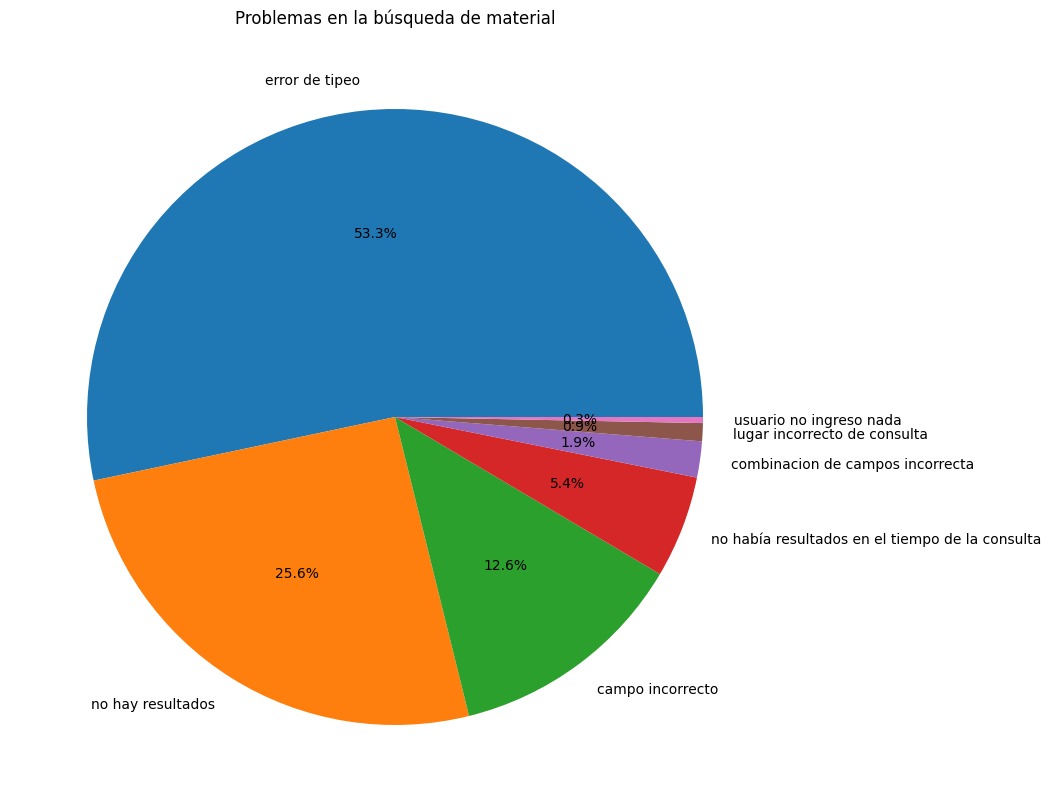

In [32]:
problemas_df = cero_resultados['problema_detectado'].value_counts().reset_index()
problemas_df.columns = ['Problema', 'Frecuencia']
print(tabulate(problemas_df, headers='keys', tablefmt='pipe', showindex=False))
cero_resultados['problema_detectado'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 10))
plt.title('Problemas en la búsqueda de material')
plt.ylabel('')
plt.show()

### Análisis a los datos con al menos un resultado

#### Medidas descriptivas sobre las filas que tienen al menos un resultado

In [33]:
# Filtramos las búsquedas que tengan al menos un resultado
busq_con_resultados = df_filtrado[df_filtrado['total'] > 0].copy()

# Vemos cuántas búsquedas tienen al menos un resultado
print(len(busq_con_resultados))

# Aplicamos la función para extraer la sintaxis de las búsquedas que tienen al menos un resultado
busq_con_resultados.loc[:, 'sintaxis'] = busq_con_resultados['query_desc'].apply(extraer_sintaxis)

# Reordenamos las columnas
busq_con_resultados = busq_con_resultados[['sessionid', 'query_desc', 'total', 'time', 'categorycode', 'campo_utilizado', 'sintaxis', 'cant_campos_utilizados']]

2169


In [34]:
# Queremos saber el porcentaje de búsquedas que tengan 10 o menos resultados
print(f"El porcentaje de busquedas que tengan 10 o menos resultados son: {round(len(busq_con_resultados[busq_con_resultados['total'] <= 10]) / len(busq_con_resultados)*100, 2)}%")

# Lo mismo, pero esta vez para las búsquedas que tengan 50 o menos resultados
print(f"El porcentaje de busquedas que tengan 50 o menos resultados son: {round(len(busq_con_resultados[busq_con_resultados['total'] <= 50]) / len(busq_con_resultados)*100, 2)}%")

# Lo mismo, pero ahora las busquedas con resultados mayores a 100
print(f"El porcentaje de busquedas que tengan 100 o mas resultados son: {round(len(busq_con_resultados[busq_con_resultados['total'] > 100]) / len(busq_con_resultados)*100, 2)}%")

El porcentaje de busquedas que tengan 10 o menos resultados son: 50.76%
El porcentaje de busquedas que tengan 50 o menos resultados son: 77.5%
El porcentaje de busquedas que tengan 100 o mas resultados son: 16.04%


#### Gráficos y tablas de frecuencias para saber la cantidad campos y qué campos son los más utilizados

| Campo    |   Frecuencia |
|:---------|-------------:|
| kw       |         1595 |
| au       |          210 |
| mc-itype |          197 |
| ti       |          108 |
| an       |           64 |
| su       |           56 |
| su-to    |           30 |
| bc       |           14 |
| l-format |            5 |
| se       |            2 |
| not au   |            1 |
| provider |            1 |
| in       |            1 |


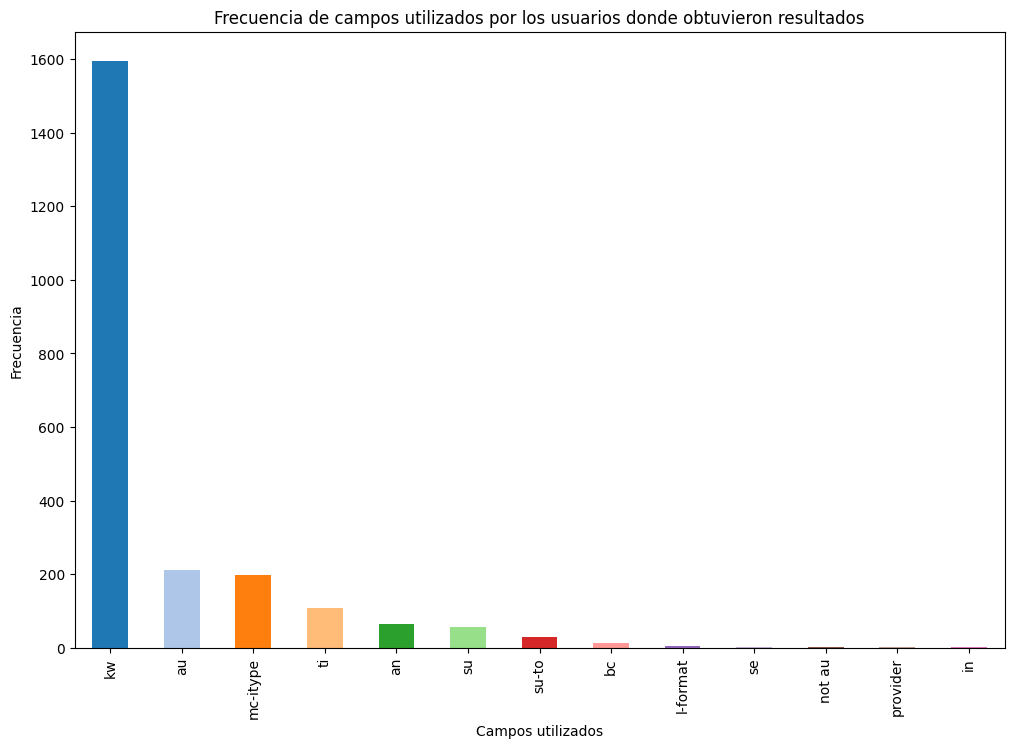

In [35]:
# Convertimos los campos a minúsculas y sumamos las frecuencias
frecuencia_campos = busq_con_resultados['campo_utilizado'].str.lower().str.split(', ', expand=True).stack().value_counts()
frecuencia_campos_df = frecuencia_campos.reset_index()
frecuencia_campos_df.columns = ['Campo', 'Frecuencia']
print(tabulate(frecuencia_campos_df, headers='keys', tablefmt='pipe', showindex=False))

# Gráfico de las frecuencias de los campos utilizados por los usuarios
plt.figure(figsize=(12, 8))
frecuencia_campos.plot(kind='bar', color=plt.cm.tab20.colors)
plt.xlabel('Campos utilizados')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de campos utilizados por los usuarios donde obtuvieron resultados')
plt.show()

|   cant_campos_utilizados |   count |
|-------------------------:|--------:|
|                        1 |    2072 |
|                        2 |      82 |
|                        3 |      12 |
|                        4 |       3 |


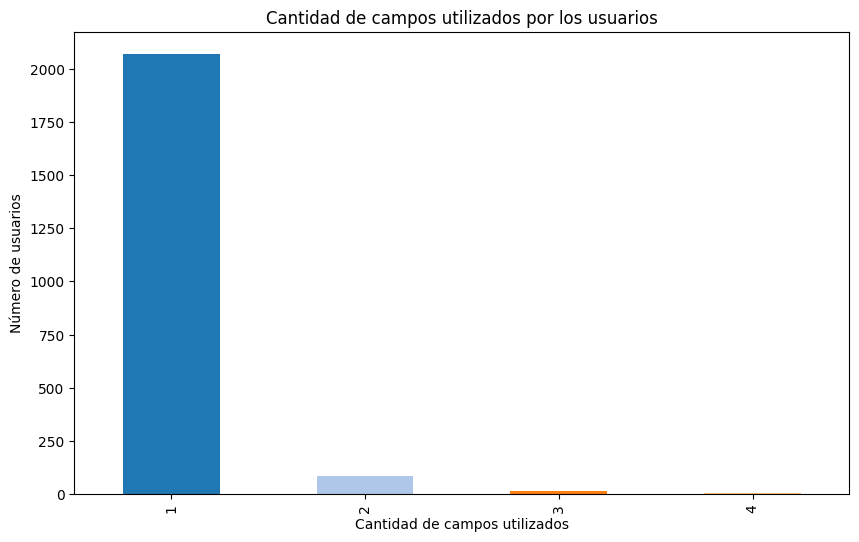

In [36]:
# Contamos la cantidad de veces que se utiliza cada cantidad de campos
cant_campos = busq_con_resultados['cant_campos_utilizados'].value_counts().sort_index()
print(tabulate(cant_campos.reset_index(), headers='keys', tablefmt='pipe', showindex=False))

# Gráfico de barras para la cantidad de campos utilizados por los usuarios
plt.figure(figsize=(10, 6))
cant_campos.plot(kind='bar', color=plt.cm.tab20.colors)
plt.xlabel('Cantidad de campos utilizados')
plt.ylabel('Número de usuarios')
plt.title('Cantidad de campos utilizados por los usuarios')
plt.show()

#### Vemos si al realizar la mismas consultas, el sistema devuelve la misma cantidad de resultados

In [37]:
# Identificar las consultas repetidas, agrupando por query_desc
consultas_repetidas = busq_con_resultados.groupby(['query_desc']).size().reset_index(name='repeticiones')
consultas_repetidas = consultas_repetidas[consultas_repetidas['repeticiones'] > 1]

# Filtrar las búsquedas repetidas
variacion_resultados = busq_con_resultados[busq_con_resultados['query_desc'].isin(consultas_repetidas['query_desc'])]
variacion_resultados = variacion_resultados.groupby(['query_desc'])['total'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Si la desviación estándar es 0, significa que los resultados son iguales. Por eso nos vamos a quedar con aquellas consultas que tengan una desviación estándar mayor a 0
variacion_resultados = variacion_resultados[variacion_resultados['std'] > 0]

# Filtramos las consultas con una desviación estándar mayor a 10
variacion_resultados_filtrados = variacion_resultados[variacion_resultados['std'] > 10]

# Mostramos los resultados obtenidos
variacion_resultados_filtrados

# Estos resultados son interesantes analizarlos en profundidad ya que nos puede dar información sobre la evolución de los registros a lo largo del tiempo.

,query_desc,mean,std,min,max
3,", mc-itype:LIB",3654.966292,43.227319,3608,3777
6,", mc-itype:RL",118.000000,31.759513,92,163
8,", mc-itype:TESINA",800.400000,16.994117,788,820
158,"kw,wrdl: calculo,",192.750000,28.500000,150,207
322,"su:""DIVULGACION CIENTIFICA"",",33.500000,38.890873,6,61


## Semana 6

### Comparación de las busquedas que utilizan un solo campos, con las busquedas que hacen una combinacion de campos

#### Medidas descriptivas sobre los dos grupos de datos

In [38]:
# Separamos las búsquedas que se realizaron con un solo campo y las que se realizaron con más de un campo
df_1campo = busq_con_resultados[busq_con_resultados['cant_campos_utilizados'] == 1].copy()
df_multi_campos = busq_con_resultados[busq_con_resultados['cant_campos_utilizados'] > 1].copy()

# Tamaño de cada dataframe
print(f"El tamaño del dataframe con búsquedas de un solo campo es: {len(df_1campo)}")
print(f"El tamaño del dataframe con búsquedas de más de un campo es: {len(df_multi_campos)}")
print("\n")

# Representando en porcentaje
print(f"El porcentaje de búsquedas de un solo campo es: {round(len(df_1campo) / len(busq_con_resultados)*100, 2)}%")
print(f"El porcentaje de búsquedas de más de un campo es: {round(len(df_multi_campos) / len(busq_con_resultados)*100, 2)}%")
print("\n")

# Vamos a ver si hay alguna diferencia en la cantidad de resultados obtenidos entre las búsquedas de un solo campo y las de más de un campo
print(f"El promedio de resultados obtenidos en las búsquedas de un solo campo es: {df_1campo['total'].mean()}")
print(f"El promedio de resultados obtenidos en las búsquedas de más de un campo es: {df_multi_campos['total'].mean()}")
print("\n")
print(f"El máximo de resultados obtenidos en las búsquedas de un solo campo es: {df_1campo['total'].max()}")
print(f"El máximo de resultados obtenidos en las búsquedas de más de un campo es: {df_multi_campos['total'].max()}")
print("\n")
print(f"La mediana de resultados obtenidos en las búsquedas de un solo campo es: {df_1campo['total'].median()}")
print(f"La mediana de resultados obtenidos en las búsquedas de más de un campo es: {df_multi_campos['total'].median()}")

# Notamos una gran diferencia en los resultados obtenidos entre las búsquedas de un solo campo y las de más de un campo.

El tamaño del dataframe con búsquedas de un solo campo es: 2072
El tamaño del dataframe con búsquedas de más de un campo es: 97


El porcentaje de búsquedas de un solo campo es: 95.53%
El porcentaje de búsquedas de más de un campo es: 4.47%


El promedio de resultados obtenidos en las búsquedas de un solo campo es: 228.56563706563708
El promedio de resultados obtenidos en las búsquedas de más de un campo es: 86.73195876288659


El máximo de resultados obtenidos en las búsquedas de un solo campo es: 11525
El máximo de resultados obtenidos en las búsquedas de más de un campo es: 3634


La mediana de resultados obtenidos en las búsquedas de un solo campo es: 10.0
La mediana de resultados obtenidos en las búsquedas de más de un campo es: 7.0


In [39]:
# Calculamos la tasa de error para las búsquedas de un solo campo
tasa_1campo = len(cero_resultados[cero_resultados['cant_campos_utilizados'] == 1]) / len(cero_resultados) * 100
print(f"La tasa de error para las búsquedas de un solo campo es: {round(tasa_1campo, 2)}%")

# Calculamos la tasa de error para las búsquedas de más de un campo
tasa_multicampos = len(cero_resultados[cero_resultados['cant_campos_utilizados'] > 1]) / len(cero_resultados) * 100
print(f"La tasa de error para las búsquedas de más de un campo es: {round(tasa_multicampos, 2)}%")

La tasa de error para las búsquedas de un solo campo es: 97.79%
La tasa de error para las búsquedas de más de un campo es: 1.89%


#### Histogramas de la distribuciones de los resultados según la cantidad de campos utilizados

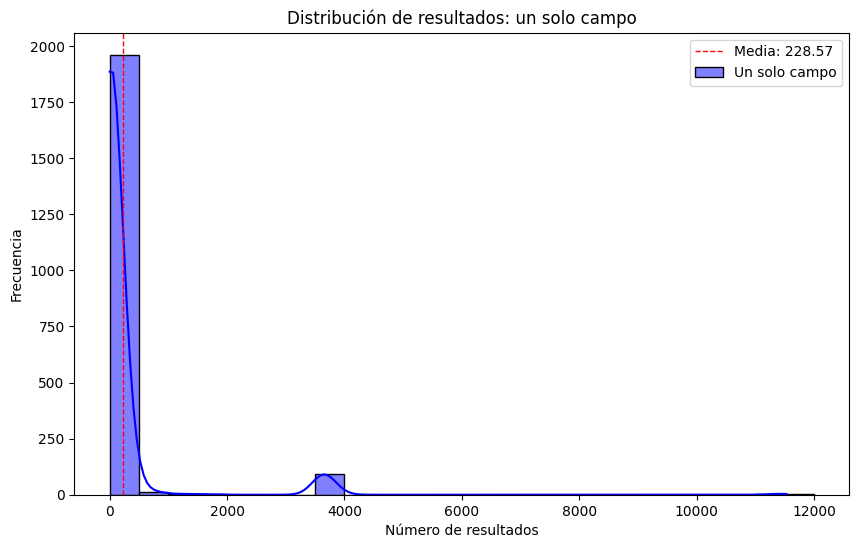

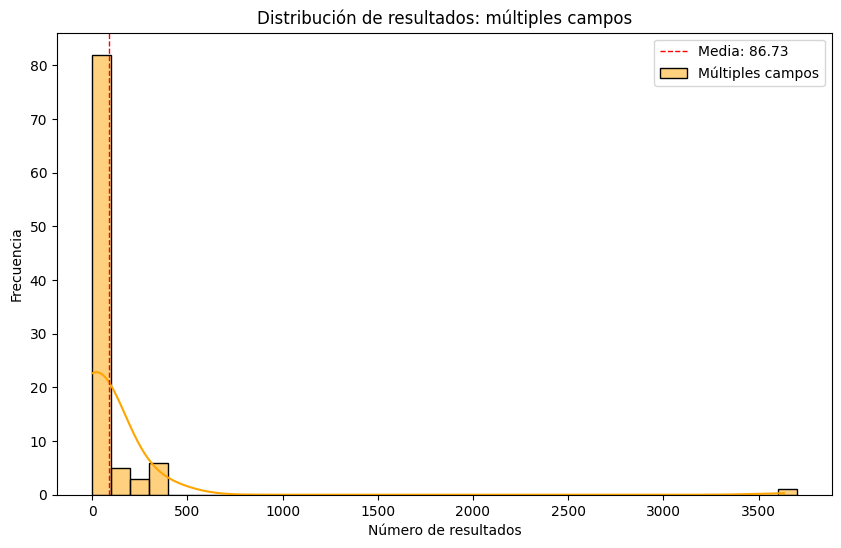

In [40]:
# Histograma para búsquedas de un solo campo
bins = range(0, int(df_1campo['total'].max()) + 500, 500)
plt.figure(figsize=(10, 6))
sns.histplot(df_1campo['total'], kde=True, color='blue', label='Un solo campo', bins=bins)
plt.axvline(df_1campo['total'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {df_1campo["total"].mean():.2f}')
plt.xlabel('Número de resultados')
plt.ylabel('Frecuencia')
plt.title('Distribución de resultados: un solo campo')
plt.legend()
plt.show()

#==================================================================================================================================================

# Histograma para búsquedas de múltiples campos
bins = range(0, int(df_multi_campos['total'].max()) + 100, 100)
plt.figure(figsize=(10, 6))
sns.histplot(df_multi_campos['total'], kde=True, color='orange', label='Múltiples campos', bins=bins)
plt.axvline(df_multi_campos['total'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {df_multi_campos["total"].mean():.2f}')
plt.xlabel('Número de resultados')
plt.ylabel('Frecuencia')
plt.title('Distribución de resultados: múltiples campos')
plt.legend()
plt.show()

#### Unificación de los dos histogramas anteriores

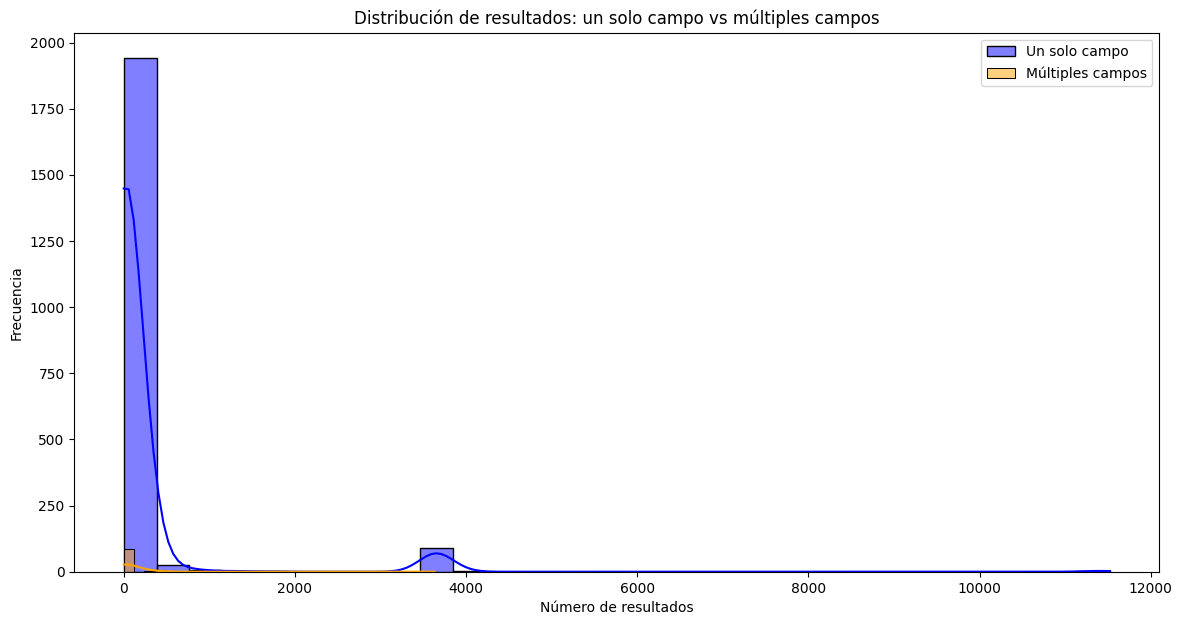

In [41]:
# Comparar la distribución de los resultados entre ambos dataframes
plt.figure(figsize=(14, 7))

# Distribución de resultados para búsquedas de un solo campo
sns.histplot(df_1campo['total'], kde=True, color='blue', label='Un solo campo', bins=30)
# Distribución de resultados para búsquedas de múltiples campos
sns.histplot(df_multi_campos['total'], kde=True, color='orange', label='Múltiples campos', bins=30)

plt.xlabel('Número de resultados')
plt.ylabel('Frecuencia')
plt.title('Distribución de resultados: un solo campo vs múltiples campos')
plt.legend()
plt.show()

## Semana 7

### Análisis sobre las diferentes terminos y campos de busqueda utilizados

#### Conteo de las distintas consultas que se hicieron en el sistema, para una posterior graficación de los resultados

In [42]:
terminos_busq = busq_con_resultados
terminos_busq.loc[:, 'sintaxis'] = terminos_busq['query_desc'].apply(extraer_sintaxis)

| sintaxis    |   count |
|:------------|--------:|
| serway      |      90 |
| lib         |      90 |
| cooper      |      74 |
| cengel      |      43 |
| prometheus  |      43 |
| silverthorn |      34 |
| lodish      |      29 |
| mezquita    |      25 |
| ross        |      21 |
| churchill   |      21 |
| stewart     |      20 |
| tortora     |      19 |
| curtis      |      19 |
| chang       |      18 |
| alberts     |      18 |
| rhoades     |      15 |
| boylestad   |      15 |
| rev         |      14 |
| tipler      |      13 |
| frumento    |      13 |


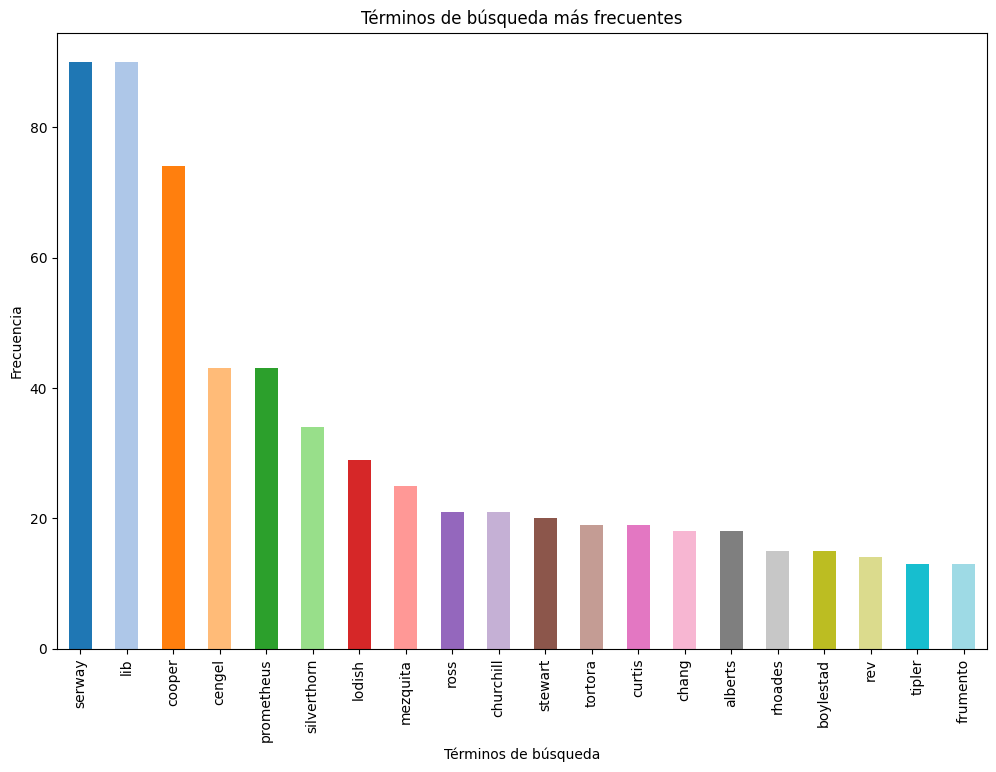

In [43]:
# Contar la frecuencia de cada término, posterior al pasado de los terminos a minusculas
frecuencia_terminos = terminos_busq['sintaxis'].str.lower().value_counts()

# Mostrar los términos más frecuentes
print(tabulate(frecuencia_terminos.head(20).reset_index(), headers='keys', tablefmt='pipe', showindex=False))

# Graficar la frecuencia de los términos más frecuentes
plt.figure(figsize=(12, 8))
frecuencia_terminos.head(20).plot(kind='bar', color=plt.cm.tab20.colors)
plt.xlabel('Términos de búsqueda')
plt.ylabel('Frecuencia')
plt.title('Términos de búsqueda más frecuentes')
plt.show()

#### Gráfico de sectores que representa los porcentajes de las busquedas tuvieron un resultado, o no

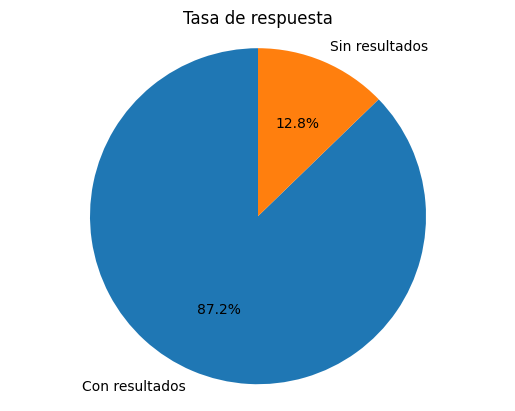

In [44]:
# Calcular la tasa de respuesta
total_busquedas = len(df_filtrado)
busquedas_con_resultados = len(df_filtrado[df_filtrado['total'] > 0])
tasa_respuesta = busquedas_con_resultados / total_busquedas

# Gráfico de pastel para la tasa de respuesta general
labels = ['Con resultados', 'Sin resultados']
sizes = [busquedas_con_resultados, total_busquedas - busquedas_con_resultados]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Tasa de respuesta')
plt.show()

#### Tasas de respuesta según cada campo o combinación de los mismos ingresados en el sistema

In [45]:
# Ordenar los términos en cada combinación para estandarizar
df_filtrado['campo_utilizado'] = df_filtrado['campo_utilizado'].fillna('').apply(lambda x: ', '.join(sorted(x.split(', '))))

# Calcular la tasa de respuesta por tipo de campo de búsqueda utilizado
tasa_respuesta_por_termino = df_filtrado.groupby('campo_utilizado').apply(lambda x: len(x[x['total'] > 0]) / len(x)).reset_index(name='tasa_respuesta')

# Dividir los porcentajes obtenidos
tasa_resp1 = tasa_respuesta_por_termino[tasa_respuesta_por_termino['tasa_respuesta'] == 1]
tasa_resp0 = tasa_respuesta_por_termino[tasa_respuesta_por_termino['tasa_respuesta'] < 1]

C:\Users\Laura\AppData\Local\Temp\ipykernel_4308\3434018740.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tasa_respuesta_por_termino = df_filtrado.groupby('campo_utilizado').apply(lambda x: len(x[x['total'] > 0]) / len(x)).reset_index(name='tasa_respuesta')


In [46]:
# Vemos cuales campos tienen un porcentaje de respuestas menor a 1
tasa_resp0

,campo_utilizado,tasa_respuesta
0,,0.000000
2,au,0.805430
8,"au, mc-itype, mc-itype, ti",0.500000
12,"au, ti",0.750000
13,bc,0.933333
14,callnum,0.000000
15,kw,0.881239
16,"kw, kw, mc-itype",0.000000
17,"kw, mc-itype",0.971429
22,"kw, su",0.000000


In [47]:
# Vemos los porcentajes que tuvieron el 100% de efectividad
tasa_resp1

,campo_utilizado,tasa_respuesta
1,an,1.0
3,"au, au",1.0
4,"au, in, ti",1.0
5,"au, kw",1.0
6,"au, mc-itype",1.0
7,"au, mc-itype, mc-itype, su-to",1.0
9,"au, su-to",1.0
10,"au, su-to, su-to",1.0
11,"au, su-to, su-to, su-to",1.0
18,"kw, mc-itype, mc-itype",1.0


## Semana 8

### Tasas de respuesta para los dos grupos de datos: con las búsquedas con un campo y con las búsquedas que tienen una combinación de campos

#### Porcentajes de encontrar una respuesta según la cantidad de camps utilizados

In [48]:
tasa_resp0.loc[:, 'cant_campos_utilizados'] = tasa_resp0['campo_utilizado'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)
tasa_resp1.loc[:, 'cant_campos_utilizados'] = tasa_resp1['campo_utilizado'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)

# Concatenamos los dataframes
tasas = pd.concat([tasa_resp0, tasa_resp1])

# Calculamos la tasa de respuesta para cada cantidad de campos utilizados
tasa_respuesta_por_cant_campos = tasas.groupby('cant_campos_utilizados')['tasa_respuesta'].mean().reset_index()

# Mostramos los resultados
print(tasa_respuesta_por_cant_campos)

   cant_campos_utilizados  tasa_respuesta
0                       1        0.731269
1                       2        0.920089
2                       3        0.875000
3                       4        0.833333


C:\Users\Laura\AppData\Local\Temp\ipykernel_4308\3033489483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasa_resp0.loc[:, 'cant_campos_utilizados'] = tasa_resp0['campo_utilizado'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)
C:\Users\Laura\AppData\Local\Temp\ipykernel_4308\3033489483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasa_resp1.loc[:, 'cant_campos_utilizados'] = tasa_resp1['campo_utilizado'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)


#### Boxplot de la distribución de resultados devueltos por el sistema según la cantidad de campos utilizados

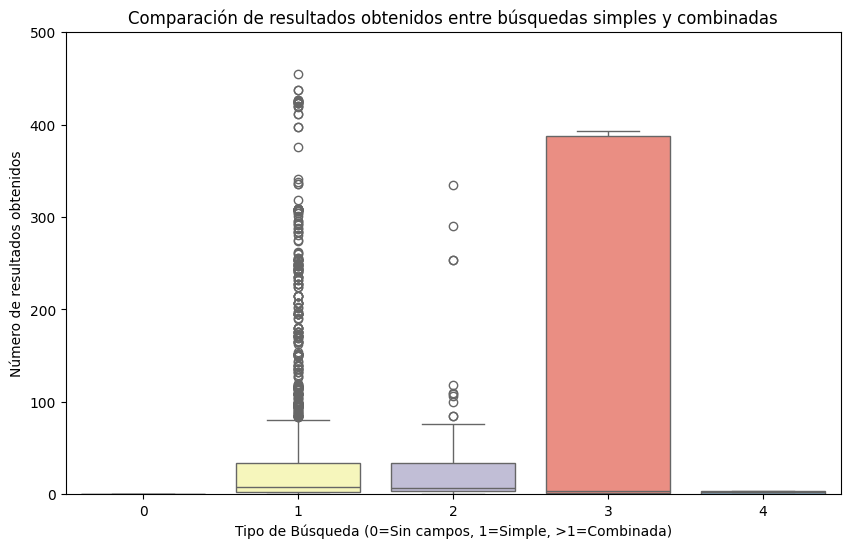

In [49]:
# Crear boxplot para comparar búsquedas simples y combinadas
plt.figure(figsize=(10, 6))
sns.boxplot(x='cant_campos_utilizados', y='total', data=df_filtrado, palette='Set3', hue='cant_campos_utilizados', legend=False)
plt.xlabel("Tipo de Búsqueda (0=Sin campos, 1=Simple, >1=Combinada)")
plt.ylabel("Número de resultados obtenidos")
plt.title("Comparación de resultados obtenidos entre búsquedas simples y combinadas")
# El limitador del eje Y esta configurado para que se vea mejor la distribución
plt.ylim(0, 500)
plt.show()